In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import functions as fx

from matplotlib import rc
from matplotlib import rcParams
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Arial']

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

pad = 12
rcParams['xtick.major.pad'] = pad
rcParams['ytick.major.pad'] = pad

dpi = 200

%matplotlib inline

In [3]:
from galpy import potential
import astropy.units as u

# Setting up potential using McMillan 2017 parameterization

In [6]:
c = 1.0
ro = 8.2
vo = 232.8

tp_amp= potential.TriaxialNFWPotential(amp=1.,a=2.,c=c)
mvir= tp_amp.mass(245./ro,245./ro,ro=ro,vo=vo)/10.**12. 
print(mvir)
# mass out to ~245 kpc in units of 10^12 Msun, for non-spherical potential need to give R and z max to integrate

tp= potential.TriaxialNFWPotential(amp=1.3/mvir,a=2.,c=c) #1.6 translates to 0.8*1.6 * 10^12 Msun
# amp = (0.8 x 10^12 Msun: desired mass) / (mvir x 10^12: mass for amp=1)
print(tp.mass(245./ro,245./ro,ro=ro,vo=vo)/10.**12.) # Should be the mass you want

bp= potential.PowerSphericalPotentialwCutoff(alpha=1.8,rc=1.9/ro,normalize=0.05) 
mp= potential.MiyamotoNagaiPotential(a=3./ro,b=0.28/ro,normalize=.6)

0.2001449702847074
1.3000000001287741


In [7]:
dper = np.arange(0.5,245.5,.5,dtype='float')

menc_haloonly = np.empty(dper.size)
menc_bulg = np.empty(dper.size)
menc_disk = np.empty(dper.size)
menc_allcomp = np.empty(dper.size)
for i in range(dper.size):
    if dper[i] < 5.0:
        mhalo = tp.mass(dper[i]/ro,dper[i]/ro, ro=ro,vo=vo)
        mbulg = bp.mass(dper[i]/ro, ro=ro,vo=vo)
        mdisk = mp.mass(dper[i]/ro, dper[i]/ro, ro=ro,vo=vo)
    else: 
        mhalo = tp.mass(dper[i]/ro,dper[i]/ro, ro=ro,vo=vo)
        mbulg = bp.mass(dper[i]/ro, ro=ro,vo=vo)
        mdisk = mp.mass(dper[i]/ro, 5./ro, ro=ro,vo=vo)
            
    menc_haloonly[i] = mhalo
    menc_allcomp[i] = mhalo + mbulg + mdisk

In [9]:
m_craII = 7.4*(10.**6.) # in units of solar masses, calculated from velocity dispersion derived in this work
rh_craII = 1066 # in units of parsecs, Torrealba+16

rj_craII = ((m_craII/(3*(menc_allcomp)))**(0.33))*dper*1000 #tidal radius in parsecs
rtidal_rhalf_cra = rj_craII/rh_craII

m_herc = 2.7*(10.**6.) #in units of solar masses, calculated using Aden+09 velocity dispersion
rh_herc = 216. #in units of parsecs, Munoz+18

rj_herc = ((m_herc/(3*menc_allcomp))**(0.33))*dper*1000 #tidal radius in parsecs
rtidal_rhalf_herc = rj_herc/rh_herc

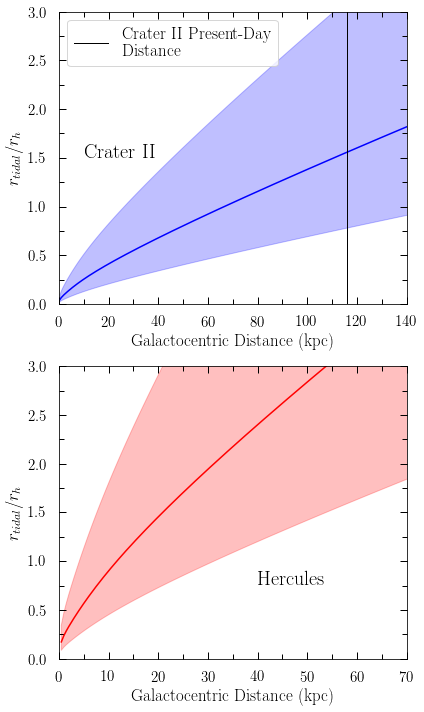

In [11]:
fig, ax = plt.subplots(2,1,figsize=(6,10))

labsize=17
tickf=15

cracolor='blue'
herccolor='red'

ax[0].plot(dper,rtidal_rhalf_cra,color=cracolor)
ax[0].fill_between(dper,rtidal_rhalf_cra*2,rtidal_rhalf_cra/2,alpha=0.25,color=cracolor)
ax[0].set_xlim(0,140)
ax[0].set_ylim(0,3)
ax[0].axvline(x=116,color='black',label='Crater II Present-Day \n Distance',lw=1)

ax[0].legend(fontsize=17)
ax[1].plot(dper,rtidal_rhalf_herc,color=herccolor)
ax[1].fill_between(dper,rtidal_rhalf_herc*2,rtidal_rhalf_herc/2,alpha=0.25,color=herccolor)
ax[1].set_xlim(0,70)
ax[1].set_ylim(0,3)


ax[0].set_ylabel(r'$r_{tidal}/r_h$',fontsize=labsize)
ax[0].set_xlabel('Galactocentric Distance (kpc)',fontsize=labsize)
ax[1].set_ylabel(r'$r_{tidal}/r_h$',fontsize=labsize)
ax[1].set_xlabel('Galactocentric Distance (kpc)',fontsize=labsize)

major_tick_length = 7
major_tick_width = 1
minor_tick_length = 5
minor_tick_width = 1

ax[0].xaxis.set_major_locator(MultipleLocator(20))
ax[0].xaxis.set_minor_locator(MultipleLocator(10))
ax[1].xaxis.set_major_locator(MultipleLocator(10))
ax[1].xaxis.set_minor_locator(MultipleLocator(5))

ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.25))
ax[1].yaxis.set_major_locator(MultipleLocator(0.5))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.25))

ax[0].set_yticklabels(np.round(np.arange(-0.5,3.5,0.5),1),fontsize=tickf)
ax[1].set_yticklabels(np.round(np.arange(-0.5,3.5,0.5),1),fontsize=tickf)

ax[0].set_xticklabels(np.round(np.arange(-20,150,20),0),fontsize=tickf)
ax[1].set_xticklabels(np.round(np.arange(-10,80,10),0),fontsize=tickf)

ax[0].tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='major',
                length = major_tick_length, width = major_tick_width)
ax[0].tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='minor',
                length = minor_tick_length, width = minor_tick_width)

ax[1].tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='major',
                length = major_tick_length, width = major_tick_width)
ax[1].tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='minor',
                length = minor_tick_length, width = minor_tick_width)

# ax[0].set_title('Crater II',fontsize=17)
# ax[1].set_title('Hercules',fontsize=17)

ax[0].text(10,1.5,'Crater II',fontsize=20)
ax[1].text(40,.75,'Hercules',fontsize=20)

fig.tight_layout()

fig.savefig('tidal_radius_new_fig4.pdf',dpi=dpi,bbox_inches='tight')